In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
from IPython.display import display

In [17]:
# Load the dataset
df = pd.read_csv('data/Groceries_dataset.csv')
print("Preview of the dataset:")
display(df.head())

print("\nNumber of rows in the raw dataset:")
print(len(df))

Preview of the dataset:


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk



Number of rows in the raw dataset:
38765



Basket size distribution (number of items per transaction):


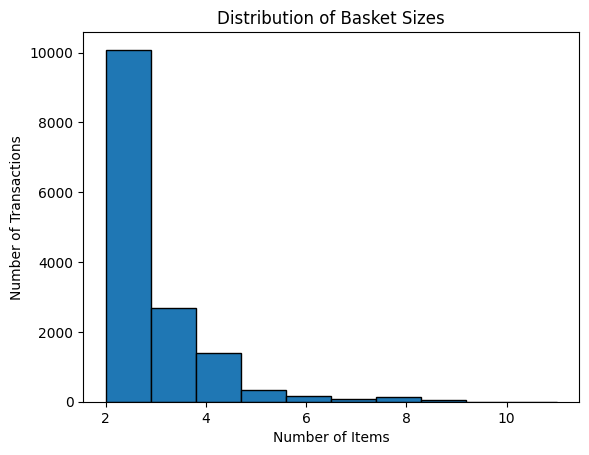

In [18]:
# Distribution of basket sizes
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
print("\nBasket size distribution (number of items per transaction):")
plt.hist(dist, bins=10, edgecolor='black')
plt.title("Distribution of Basket Sizes")
plt.xlabel("Number of Items")
plt.ylabel("Number of Transactions")
plt.show()

In [19]:
# Group transactions
df['itemDescription'] = df['itemDescription'].transform(lambda x: [x])
df = df.groupby(['Member_number', 'Date'])['itemDescription'].sum().reset_index(drop=True)

print(f"\nTotal number of grouped transactions: {len(df)}")
print("List of transactions:")
transactions = df.tolist()
transactions_df = pd.DataFrame({'items': ['; '.join(t) for t in transactions]})
display(transactions_df)


Total number of grouped transactions: 14963
List of transactions:


,items
0,sausage; whole milk; semi-finished bread; yogurt
1,whole milk; pastry; salty snack
2,canned beer; misc. beverages
3,sausage; hygiene articles
4,soda; pickled vegetables
...,...
14958,tropical fruit; berries; other vegetables; yog...
14959,bottled water; herbs
14960,fruit/vegetable juice; onions
14961,soda; root vegetables; semi-finished bread


In [20]:
# Run Apriori algorithm
rules = list(apriori(
    transactions,
    min_support=0.001,
    min_confidence=0.001,
    min_lift=1.1,
    min_length=2
))

print(f"\nNumber of unique itemsets generated by Apriori: {len(rules)}")


Number of unique itemsets generated by Apriori: 64


In [21]:
# Convert rules to DataFrame
def rules_to_df(rules):
    rules_df = pd.DataFrame(columns=['first', 'second', 'support', 'confidence', 'lift'])
    for rule in rules:
        for stat in rule.ordered_statistics:
            if stat.items_base and stat.items_add:
                rules_df.loc[len(rules_df)] = [
                    tuple(stat.items_base),
                    tuple(stat.items_add),
                    rule.support,
                    stat.confidence,
                    stat.lift
                ]
    return rules_df

rules_df = rules_to_df(rules)

print("\nAll extracted association rules:")
display(rules_df)



All extracted association rules:


,first,second,support,confidence,lift
0,"(beef,)","(brown bread,)",0.001537,0.045276,1.203301
1,"(brown bread,)","(beef,)",0.001537,0.040853,1.203301
2,"(beef,)","(curd,)",0.001270,0.037402,1.110396
3,"(curd,)","(beef,)",0.001270,0.037698,1.110396
4,"(beef,)","(frozen vegetables,)",0.001270,0.037402,1.335656
...,...,...,...,...,...
137,"(whole milk,)","(yogurt, sausage)",0.001470,0.009310,1.619866
138,"(yogurt,)","(whole milk, sausage)",0.001470,0.017121,1.911760
139,"(whole milk, sausage)","(yogurt,)",0.001470,0.164179,1.911760
140,"(yogurt, sausage)","(whole milk,)",0.001470,0.255814,1.619866


In [22]:
# Top 10 rules by confidence
Top10_conf = rules_df.nlargest(10, 'confidence').reset_index(drop=True)
Top10_conf.index = np.arange(1, len(Top10_conf)+1)
print("\nTop 10 association rules by confidence:")
display(Top10_conf)


Top 10 association rules by confidence:


,first,second,support,confidence,lift
1,"(yogurt, sausage)","(whole milk,)",0.001470,0.255814,1.619866
2,"(rolls/buns, sausage)","(whole milk,)",0.001136,0.212500,1.345594
3,"(sausage, soda)","(whole milk,)",0.001069,0.179775,1.138374
4,"(semi-finished bread,)","(whole milk,)",0.001671,0.176056,1.114825
5,"(whole milk, sausage)","(yogurt,)",0.001470,0.164179,1.911760
6,"(processed cheese,)","(rolls/buns,)",0.001470,0.144737,1.315734
7,"(packaged fruit/vegetables,)","(rolls/buns,)",0.001203,0.141732,1.288421
8,"(seasonal products,)","(rolls/buns,)",0.001002,0.141509,1.286395
9,"(rolls/buns, soda)","(other vegetables,)",0.001136,0.140496,1.150651
10,"(frankfurter,)","(other vegetables,)",0.005146,0.136283,1.116150


In [23]:
# Top 10 rules by lift
Top10_lift = rules_df.nlargest(10, 'lift').reset_index(drop=True)
Top10_lift.index = np.arange(1, len(Top10_lift)+1)
print("\nTop 10 association rules by lift:")
display(Top10_lift)


Top 10 association rules by lift:


,first,second,support,confidence,lift
1,"(sausage,)","(yogurt, whole milk)",0.001470,0.024363,2.182917
2,"(yogurt, whole milk)","(sausage,)",0.001470,0.131737,2.182917
3,"(whole milk, sausage)","(yogurt,)",0.001470,0.164179,1.911760
4,"(yogurt,)","(whole milk, sausage)",0.001470,0.017121,1.911760
5,"(citrus fruit,)","(specialty chocolate,)",0.001403,0.026415,1.653762
6,"(specialty chocolate,)","(citrus fruit,)",0.001403,0.087866,1.653762
7,"(yogurt, sausage)","(whole milk,)",0.001470,0.255814,1.619866
8,"(whole milk,)","(yogurt, sausage)",0.001470,0.009310,1.619866
9,"(tropical fruit,)","(flour,)",0.001069,0.015779,1.617141
10,"(flour,)","(tropical fruit,)",0.001069,0.109589,1.617141
